In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import time

# Importation des environnements
from Environnement_RL.environnements.line_world import LineWorld
from Environnement_RL.environnements.grid_world import GridWorld
from Environnement_RL.environnements.rock_paper_scissors import RockPaperScissors
from Environnement_RL.environnements.monty_hall_paradox1 import MontyHallParadox1
from Environnement_RL.environnements.monty_hall_paradox2 import MontyHallParadox2

# Importation de l'algorithme Value Iteration
from algos.modules import ValueIteration

c:\Users\Hugo HOUNTONDJI\OneDrive\Bureau\Deep Reinforcement Learning Project\algos\modules\utils.py:24: UserWarning: joblib n'est pas disponible. Utilisation de pickle par défaut.
  warnings.warn("joblib n'est pas disponible. Utilisation de pickle par défaut.")


In [2]:
# Test avec différents gamma et theta
params = [
    {'gamma': 0.9, 'theta': 1e-6},     # Configuration de base
    {'gamma': 0.99, 'theta': 1e-6},    # gamma plus élevé
    {'gamma': 0.999, 'theta': 1e-6},   # gamma très élevé
    {'gamma': 0.9, 'theta': 1e-4},     # theta plus élevé
    {'gamma': 0.9, 'theta': 1e-8},     # theta plus bas
    {'gamma': 0.95, 'theta': 1e-6},    # gamma intermédiaire
    {'gamma': 0.8, 'theta': 1e-6},     # gamma plus bas
    {'gamma': 0.99, 'theta': 1e-4},    # gamma élevé, theta élevé
    {'gamma': 0.99, 'theta': 1e-8},    # gamma élevé, theta bas
    {'gamma': 0.95, 'theta': 1e-7}     # configuration intermédiaire
]

## 1. LineWorld (longueur = 8)

Test avec 10 configurations différentes d'hyperparamètres.

In [3]:
# Initialisation de l'environnement
env = LineWorld(length=16)

results = []
print("Test de Value Iteration sur LineWorld :")

for i, p in enumerate(params, 1):
    print(f"\nConfiguration {i}:")
    print(f"gamma = {p['gamma']}, theta = {p['theta']}")
    
    # Initialisation et entraînement
    vi = ValueIteration(env=env, gamma=p['gamma'], theta=p['theta'])
    start_time = time.time()
    result = vi.train(max_iterations=1000)
    training_time = time.time() - start_time
    
    # Test de la politique
    state = env.reset()
    total_reward = 0
    done = False
    step_count = 0
    
    print("\nTest de la politique :")
    env.visualisation()
    
    while not done:
        action = np.argmax(result['policy'][state])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        state = next_state
        env.visualisation()
        step_count += 1
        
    results.append({
        'V': result['V'],
        'iterations': result['iterations'],
        'training_time': training_time,
        'total_reward': total_reward,
        'step_count': step_count
    })
    
    print(f"\nRésultats :")
    print(f"Convergence en {result['iterations']} itérations")
    print(f"Temps d'entraînement : {training_time:.2f} secondes")
    print(f"Récompense totale : {total_reward}")
    print(f"Nombre de pas : {step_count}")

# Sauvegarder les résultats LineWorld
results_line = results

Test de Value Iteration sur LineWorld :

Configuration 1:
gamma = 0.9, theta = 1e-06
Convergence atteinte après 8 itérations (delta = 0.000000)

Test de la politique :

[T] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [A] [ ] [ ] [ ] [ ] [ ] [ ] [T]
 0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 

[T] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [A] [ ] [ ] [ ] [ ] [ ] [T]
 0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 

[T] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [A] [ ] [ ] [ ] [ ] [T]
 0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 

[T] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [A] [ ] [ ] [ ] [T]
 0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 

[T] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [A] [ ] [ ] [T]
 0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 

[T] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [A] [ ] [T]
 0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 

[T] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [

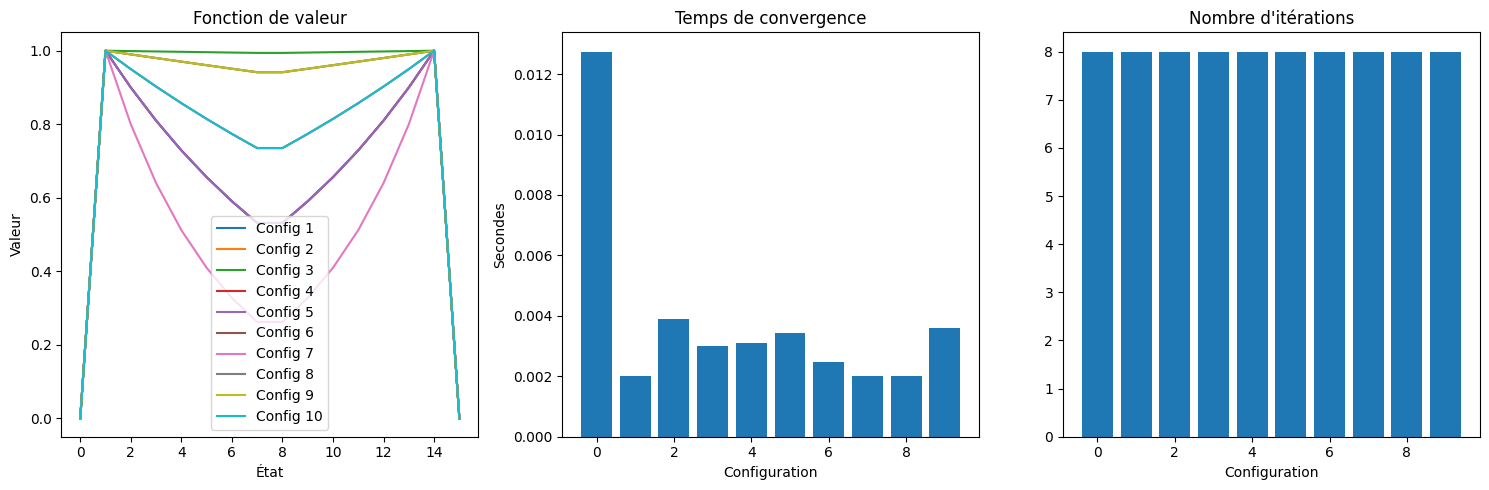

In [4]:
# Visualisation des résultats LineWorld
plt.figure(figsize=(15, 5))

# Fonction de valeur pour chaque configuration
plt.subplot(131)
for i, r in enumerate(results):
    plt.plot(r['V'], label=f"Config {i+1}")
plt.title('Fonction de valeur')
plt.xlabel('État')
plt.ylabel('Valeur')
plt.legend()

# Temps de convergence
plt.subplot(132)
plt.bar(range(len(results)), [r['training_time'] for r in results])
plt.title('Temps de convergence')
plt.xlabel('Configuration')
plt.ylabel('Secondes')

# Nombre d'itérations
plt.subplot(133)
plt.bar(range(len(results)), [r['iterations'] for r in results])
plt.title('Nombre d\'itérations')
plt.xlabel('Configuration')

plt.tight_layout()
plt.show()

## 2. GridWorld (taille = 5x5)

Test avec les mêmes configurations d'hyperparamètres.

In [5]:
# Test avec différents gamma et theta
params2 = [
    {'gamma': 0.9, 'theta': 1e-6},     # Configuration de base
    {'gamma': 0.99, 'theta': 1e-6},    # gamma plus élevé
    {'gamma': 0.999, 'theta': 1e-6}   # gamma très élevé
]

In [6]:
results = []
print("Test de Value Iteration sur GridWorld :")

for i, p in enumerate(params2, 1):
    print(f"\nConfiguration {i}:")
    print(f"gamma = {p['gamma']}, theta = {p['theta']}")
    
    # Créer un nouvel environnement pour chaque configuration
    env = GridWorld(n_rows=10, n_cols=10)
    print("\nTest de la politique :")
    env.visualisation()
    
    # Initialisation et entraînement
    vi = ValueIteration(env=env, gamma=p['gamma'], theta=p['theta'])
    start_time = time.time()
    result = vi.train(max_iterations=1000)
    training_time = time.time() - start_time
    
    # Test de la politique
    state = env.reset()
    total_reward = 0
    done = False
    step_count = 0
    
    
    
    while not done:
        # Get the optimal action directly from the policy
        action = int(np.where(result['policy'][state] == 1)[0][0])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        state = next_state
        env.visualisation()
        step_count += 1
        
    results.append({
        'V': result['V'],
        'iterations': result['iterations'],
        'training_time': training_time,
        'total_reward': total_reward,
        'step_count': step_count
    })
    
    print(f"\nRésultats :")
    print(f"Convergence en {result['iterations']} itérations")
    print(f"Temps d'entraînement : {training_time:.2f} secondes")
    print(f"Récompense totale : {total_reward}")
    print(f"Nombre de pas : {step_count}")

# Sauvegarder les résultats GridWorld
results_grid = results

Test de Value Iteration sur GridWorld :

Configuration 1:
gamma = 0.9, theta = 1e-06

Test de la politique :

               Grid World               
----------------------------------------
+---+---+---+---+---+---+---+---+---+---+
|[T]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[ ]|[ ]|[ ]|[A]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|[ ]|
+---+---+---+---+---+---+---+---+---+---+
|[ ]|[ ]|[

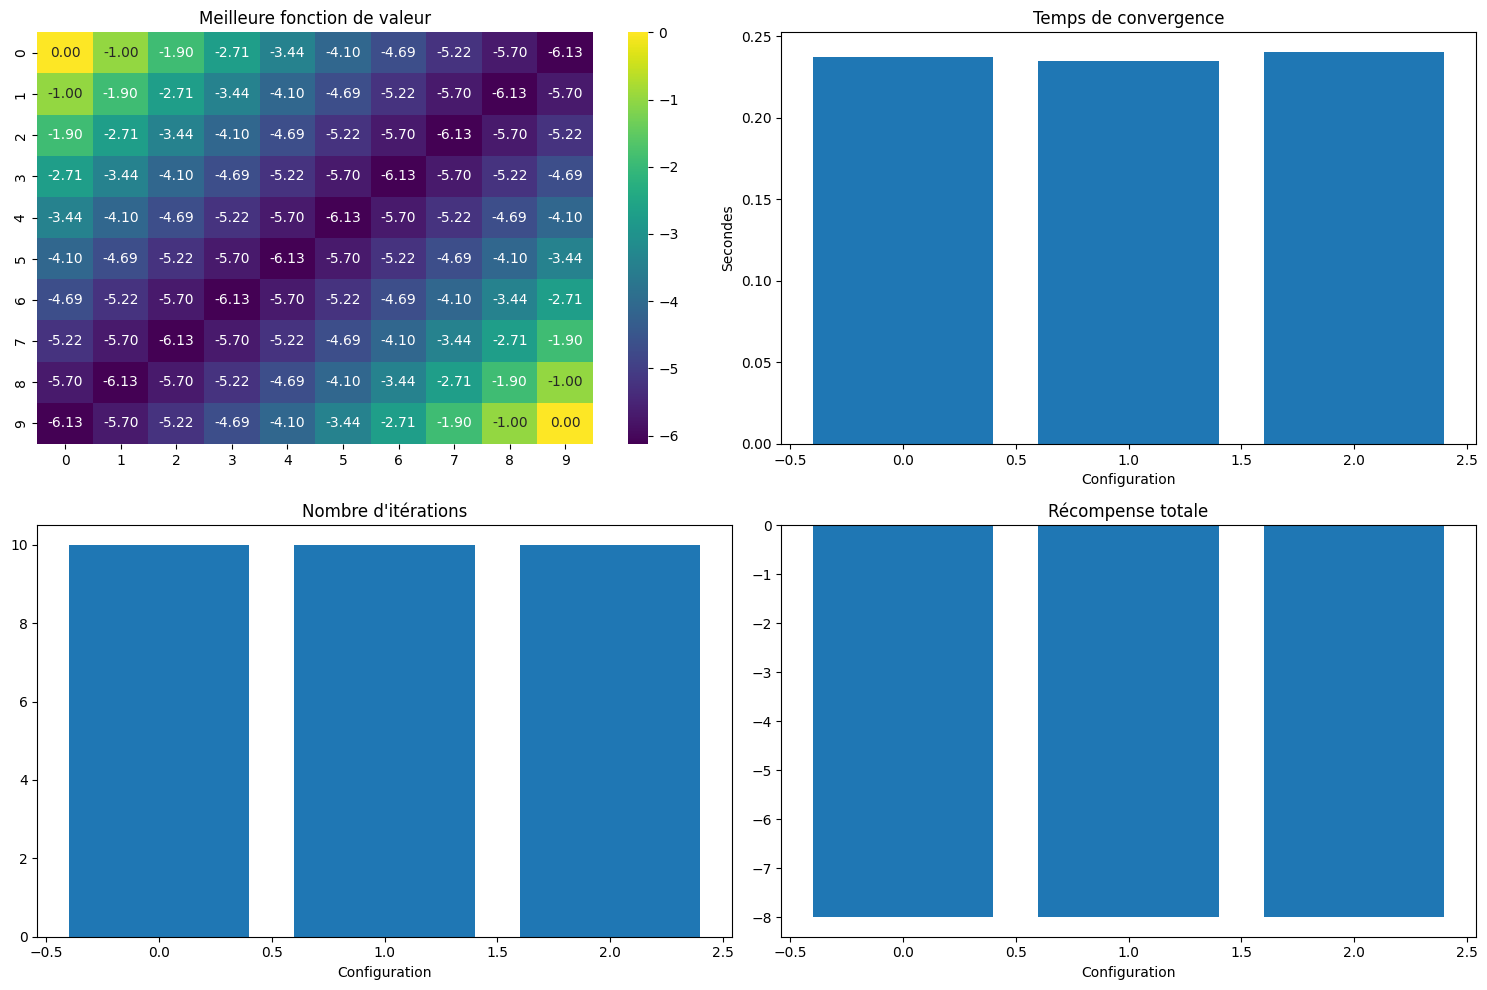

In [7]:
# Visualisation des résultats GridWorld
plt.figure(figsize=(15, 10))

# Fonction de valeur (heatmap) pour la meilleure configuration
best_result = max(results, key=lambda x: x['total_reward'])
V_grid = best_result['V'].reshape(10, 10)

plt.subplot(221)
sns.heatmap(V_grid, annot=True, fmt='.2f', cmap='viridis')
plt.title('Meilleure fonction de valeur')

# Temps de convergence
plt.subplot(222)
plt.bar(range(len(results)), [r['training_time'] for r in results])
plt.title('Temps de convergence')
plt.xlabel('Configuration')
plt.ylabel('Secondes')

# Nombre d'itérations
plt.subplot(223)
plt.bar(range(len(results)), [r['iterations'] for r in results])
plt.title('Nombre d\'itérations')
plt.xlabel('Configuration')

# Récompenses totales
plt.subplot(224)
plt.bar(range(len(results)), [r['total_reward'] for r in results])
plt.title('Récompense totale')
plt.xlabel('Configuration')

plt.tight_layout()
plt.show()

## 3. Rock Paper Scissors (2 tours)

Test avec les mêmes configurations d'hyperparamètres sur le jeu Pierre-Papier-Ciseaux.

In [8]:
# Initialisation de l'environnement
env = RockPaperScissors()

results = []
print("Test de Value Iteration sur Rock Paper Scissors :")

for i, p in enumerate(params, 1):
    print(f"\nConfiguration {i}:")
    print(f"gamma = {p['gamma']}, theta = {p['theta']}")
    
    # Initialisation et entraînement
    vi = ValueIteration(env=env, gamma=p['gamma'], theta=p['theta'])
    start_time = time.time()
    result = vi.train(max_iterations=1000)
    training_time = time.time() - start_time
    
    # Test de la politique
    state = env.reset()
    total_reward = 0
    done = False
    step_count = 0
    actions_history = []
    
    print("\nTest de la politique :")
    env.visualisation()
    
    while not done:
        action = np.argmax(result['policy'][state])
        actions_history.append(action)
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        state = next_state
        env.visualisation()
        step_count += 1
        
    results.append({
        'V': result['V'],
        'policy': result['policy'],
        'iterations': result['iterations'],
        'training_time': training_time,
        'total_reward': total_reward,
        'step_count': step_count,
        'actions': actions_history
    })
    
    print(f"\nRésultats :")
    print(f"Convergence en {result['iterations']} itérations")
    print(f"Temps d'entraînement : {training_time:.2f} secondes")
    print(f"Récompense totale : {total_reward}")
    print(f"Séquence d'actions : {actions_history}")

# Sauvegarder les résultats RockPaperScissors
results_rps = results

Test de Value Iteration sur Rock Paper Scissors :

Configuration 1:
gamma = 0.9, theta = 1e-06
Convergence atteinte après 126 itérations (delta = 0.000001)

Test de la politique :

               🎮 ROUND 🎮                
----------------------------------------
         🎲 Nouvelle partie ! 🎲          


               🎮 ROUND 🎮                
----------------------------------------
Vous      : 🪨  Pierre
Adversaire: 🪨  Pierre
----------------------------------------
           It's a tie ! Wow 🤝           


               🎮 ROUND 🎮                
----------------------------------------
Vous      : 🪨  Pierre
Adversaire: 🪨  Pierre
----------------------------------------
           It's a tie ! Wow 🤝           


Résultats :
Convergence en 126 itérations
Temps d'entraînement : 0.16 secondes
Récompense totale : 0
Séquence d'actions : [np.int64(0), np.int64(0)]

Configuration 2:
gamma = 0.99, theta = 1e-06

Test de la politique :

               🎮 ROUND 🎮                
-------------

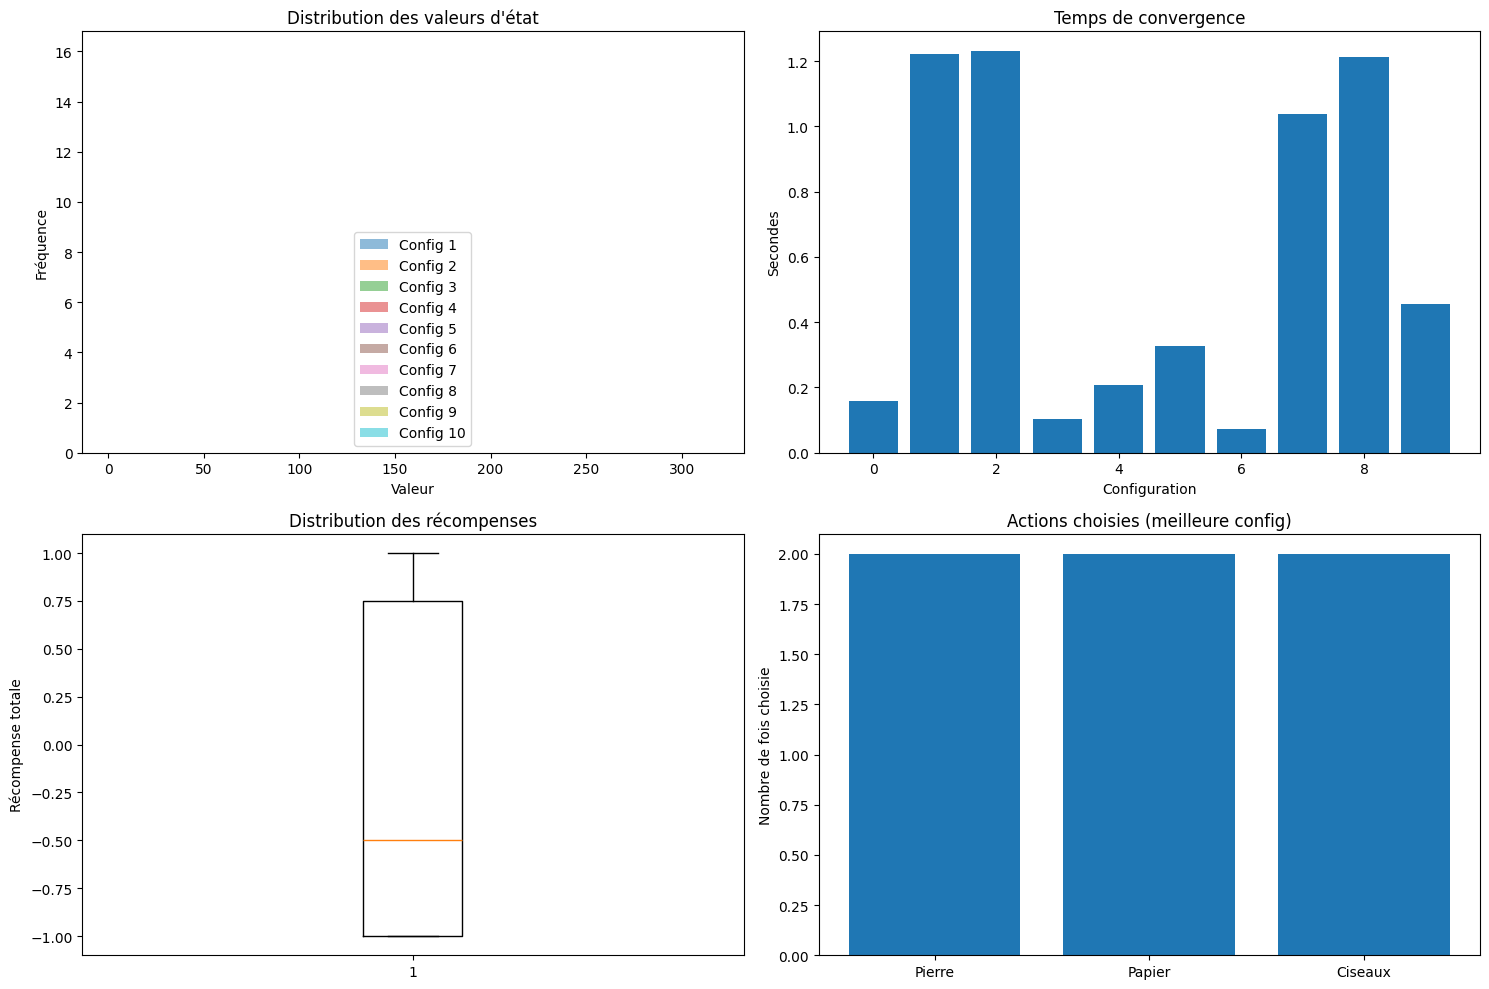

In [9]:
# Visualisation des résultats RockPaperScissors
plt.figure(figsize=(15, 10))

# Distribution des valeurs d'état
plt.subplot(221)
for i, r in enumerate(results):
    plt.hist(r['V'], alpha=0.5, label=f"Config {i+1}", bins=20)
plt.title('Distribution des valeurs d\'état')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.legend()

# Temps de convergence
plt.subplot(222)
plt.bar(range(len(results)), [r['training_time'] for r in results])
plt.title('Temps de convergence')
plt.xlabel('Configuration')
plt.ylabel('Secondes')

# Distribution des récompenses
plt.subplot(223)
plt.boxplot([r['total_reward'] for r in results])
plt.title('Distribution des récompenses')
plt.ylabel('Récompense totale')

# Actions choisies (pour la meilleure configuration)
best_result = max(results, key=lambda x: x['total_reward'])
plt.subplot(224)
action_counts = np.bincount(best_result['actions'])
plt.bar(['Pierre', 'Papier', 'Ciseaux'], action_counts)
plt.title('Actions choisies (meilleure config)')
plt.ylabel('Nombre de fois choisie')

plt.tight_layout()
plt.show()

## 4. Monty Hall Paradox Niveau 1 (3 portes)

Test avec les mêmes configurations d'hyperparamètres sur le paradoxe de Monty Hall niveau 1.

In [10]:
# MontyHallParadox1
env = MontyHallParadox1()

results = []
print("Test de Value Iteration sur Monty Hall Niveau 1 (CORRIGÉ):")

for i, p in enumerate(params, 1):
    print(f"\nConfiguration {i}:")
    print(f"gamma = {p['gamma']}, theta = {p['theta']}")
    
    # Initialisation et entraînement
    vi = ValueIteration(env=env, gamma=p['gamma'], theta=p['theta'])
    start_time = time.time()
    result = vi.train(max_iterations=1000)
    training_time = time.time() - start_time
    
    # Test de la politique sur plusieurs épisodes
    n_episodes = 100
    total_rewards = []
    switch_rates = []
    success_rates = []
    
    for _ in range(n_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        switched = False
        
        while not done:
            # CORRECTION: Convertir l'état tuple en index pour accéder à la politique
            state_idx = env.state_to_idx[state]
            action = np.argmax(result['policy'][state_idx])
            
            # CORRECTION: Détecter si on est en phase 2 (chosen n'est pas None)
            if state[1] is not None:  # state = (winning, chosen, revealed)
                switched = (action == 1)  # 1 = changer de porte
                
            next_state, reward, done, info = env.step(action)
            total_reward += reward
            state = next_state
            
        total_rewards.append(total_reward)
        switch_rates.append(switched)
        success_rates.append(total_reward > 0)
    
    results.append({
        'V': result['V'],
        'iterations': result['iterations'],
        'training_time': training_time,
        'avg_reward': np.mean(total_rewards),
        'switch_rate': np.mean(switch_rates),
        'success_rate': np.mean(success_rates)
    })
    
    print(f"\nRésultats :")
    print(f"Convergence en {result['iterations']} itérations")
    print(f"Temps d'entraînement : {training_time:.2f} secondes")
    print(f"Taux de changement de porte : {results[-1]['switch_rate']:.2%}")
    print(f"Taux de succès : {results[-1]['success_rate']:.2%}")

# Sauvegarder les résultats MontyHallParadox1
results_mh1 = results


Test de Value Iteration sur Monty Hall Niveau 1 (CORRIGÉ):

Configuration 1:
gamma = 0.9, theta = 1e-06
Convergence atteinte après 3 itérations (delta = 0.000000)

Résultats :
Convergence en 3 itérations
Temps d'entraînement : 0.00 secondes
Taux de changement de porte : 100.00%
Taux de succès : 68.00%

Configuration 2:
gamma = 0.99, theta = 1e-06
Convergence atteinte après 3 itérations (delta = 0.000000)

Résultats :
Convergence en 3 itérations
Temps d'entraînement : 0.00 secondes
Taux de changement de porte : 100.00%
Taux de succès : 66.00%

Configuration 3:
gamma = 0.999, theta = 1e-06
Convergence atteinte après 3 itérations (delta = 0.000000)

Résultats :
Convergence en 3 itérations
Temps d'entraînement : 0.00 secondes
Taux de changement de porte : 100.00%
Taux de succès : 65.00%

Configuration 4:
gamma = 0.9, theta = 0.0001
Convergence atteinte après 3 itérations (delta = 0.000000)

Résultats :
Convergence en 3 itérations
Temps d'entraînement : 0.00 secondes
Taux de changement de p

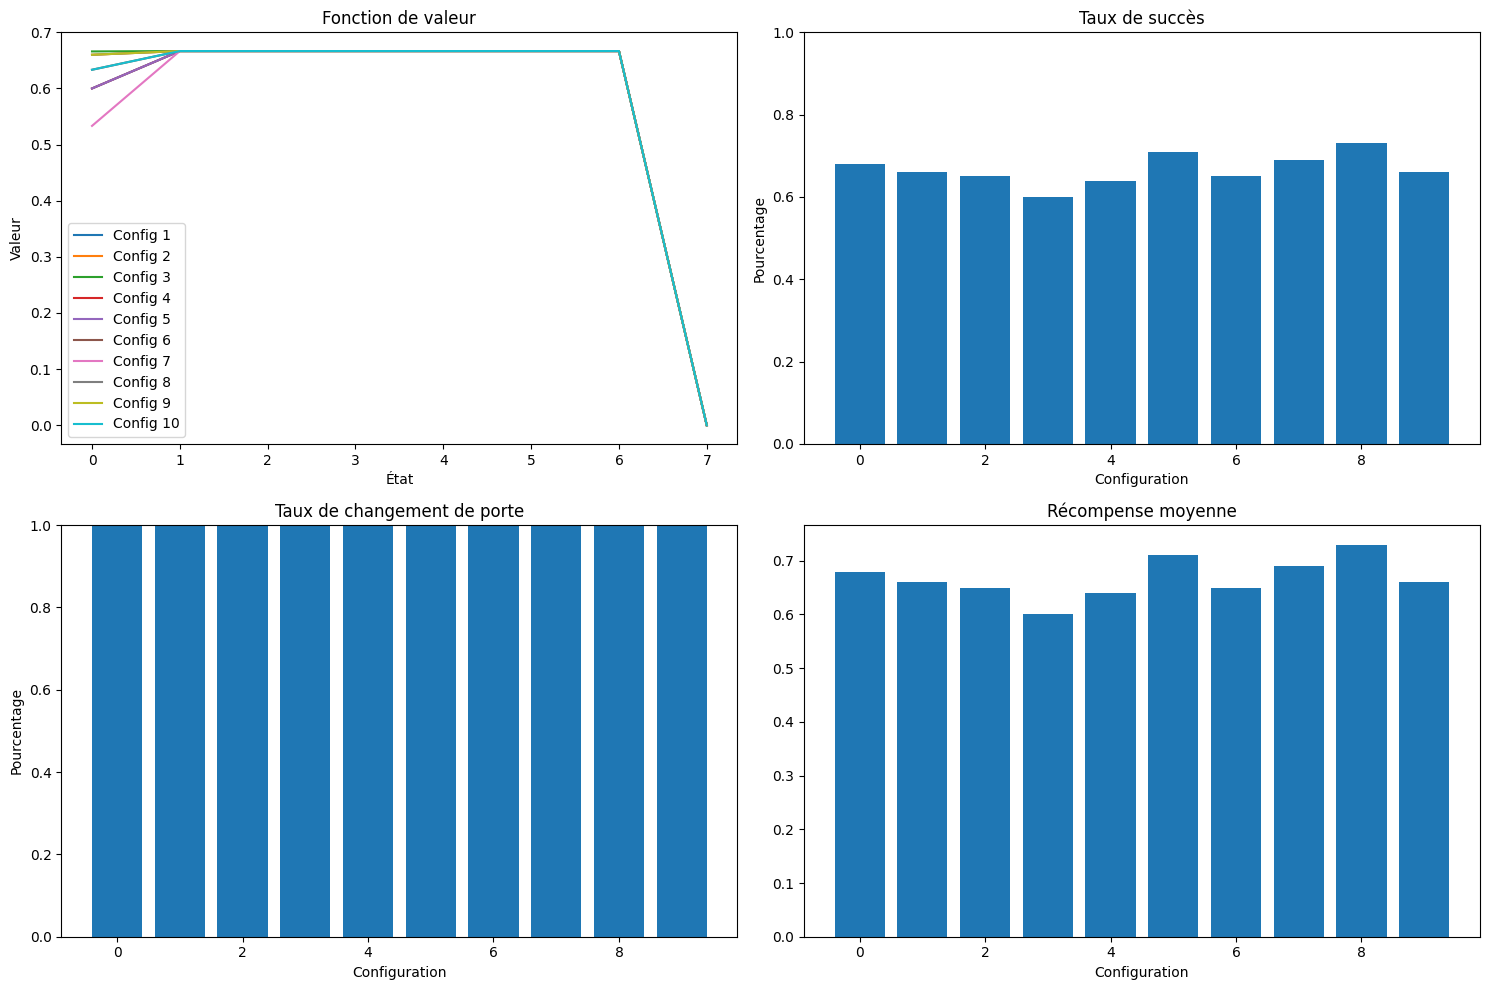

In [11]:
# Visualisation des résultats Monty Hall Niveau 1
plt.figure(figsize=(15, 10))

# Fonction de valeur pour chaque configuration
plt.subplot(221)
for i, r in enumerate(results):
    plt.plot(r['V'], label=f"Config {i+1}")
plt.title('Fonction de valeur')
plt.xlabel('État')
plt.ylabel('Valeur')
plt.legend()

# Taux de succès
plt.subplot(222)
plt.bar(range(len(results)), [r['success_rate'] for r in results])
plt.title('Taux de succès')
plt.xlabel('Configuration')
plt.ylabel('Pourcentage')
plt.ylim(0, 1)

# Taux de changement de porte
plt.subplot(223)
plt.bar(range(len(results)), [r['switch_rate'] for r in results])
plt.title('Taux de changement de porte')
plt.xlabel('Configuration')
plt.ylabel('Pourcentage')
plt.ylim(0, 1)

# Récompense moyenne
plt.subplot(224)
plt.bar(range(len(results)), [r['avg_reward'] for r in results])
plt.title('Récompense moyenne')
plt.xlabel('Configuration')

plt.tight_layout()
plt.show()

## 5. Monty Hall Paradox Niveau 2 (5 portes)

Test avec les mêmes configurations d'hyperparamètres sur le paradoxe de Monty Hall niveau 2.

In [12]:
# Initialisation de l'environnement
env = MontyHallParadox2()

results = []
print("Test de Value Iteration sur Monty Hall Niveau 2 :")

for i, p in enumerate(params, 1):
    print(f"\nConfiguration {i}:")
    print(f"gamma = {p['gamma']}, theta = {p['theta']}")
    
    # Initialisation et entraînement
    vi = ValueIteration(env=env, gamma=p['gamma'], theta=p['theta'])
    start_time = time.time()
    result = vi.train(max_iterations=1000)
    training_time = time.time() - start_time
    
    # Test de la politique sur plusieurs épisodes
    n_episodes = 100
    total_rewards = []
    switch_counts = []
    success_rates = []
    
    for _ in range(n_episodes):
        # Créer une nouvelle instance pour chaque épisode
        episode_env = MontyHallParadox2()
        state = episode_env.reset()
        total_reward = 0
        done = False
        switches = 0
        step_count = 0
        max_steps = 10  # Limite pour éviter les boucles infinies
        
        while not done and step_count < max_steps:
            # Convertir l'état en index numérique pour accéder à la politique
            if isinstance(state, str):
                if state == "terminal":
                    break
                state_idx = episode_env.state_to_idx[state]
            else:  # tuple
                state_idx = episode_env.state_to_idx[state]
            
            # Choisir l'action selon la politique apprise
            action = np.argmax(result['policy'][state_idx])
            
            # Compter les changements en phase finale (phase 3)
            if isinstance(state, tuple) and len(state) == 3 and state[0] == 3:
                switches += (action == 1)  # 1 = changer de porte
            
            next_state, reward, done, info = episode_env.step(action)
            total_reward += reward
            state = next_state
            step_count += 1
            
        total_rewards.append(total_reward)
        switch_counts.append(switches)
        success_rates.append(total_reward > 0)
    
    results.append({
        'V': result['V'],
        'iterations': result['iterations'],
        'training_time': training_time,
        'avg_reward': np.mean(total_rewards),
        'avg_switches': np.mean(switch_counts),
        'success_rate': np.mean(success_rates)
    })
    
    print(f"\nRésultats :")
    print(f"Convergence en {result['iterations']} itérations")
    print(f"Temps d'entraînement : {training_time:.2f} secondes")
    print(f"Nombre moyen de changements : {results[-1]['avg_switches']:.2f}")
    print(f"Taux de succès : {results[-1]['success_rate']:.2%}")

# Sauvegarder les résultats MontyHallParadox2
results_mh2 = results

Test de Value Iteration sur Monty Hall Niveau 2 :

Configuration 1:
gamma = 0.9, theta = 1e-06
Convergence atteinte après 5 itérations (delta = 0.000000)

Résultats :
Convergence en 5 itérations
Temps d'entraînement : 0.09 secondes
Nombre moyen de changements : 1.00
Taux de succès : 65.00%

Configuration 2:
gamma = 0.99, theta = 1e-06
Convergence atteinte après 5 itérations (delta = 0.000000)

Résultats :
Convergence en 5 itérations
Temps d'entraînement : 0.08 secondes
Nombre moyen de changements : 1.00
Taux de succès : 71.00%

Configuration 3:
gamma = 0.999, theta = 1e-06
Convergence atteinte après 5 itérations (delta = 0.000000)

Résultats :
Convergence en 5 itérations
Temps d'entraînement : 0.08 secondes
Nombre moyen de changements : 1.00
Taux de succès : 67.00%

Configuration 4:
gamma = 0.9, theta = 0.0001
Convergence atteinte après 5 itérations (delta = 0.000000)

Résultats :
Convergence en 5 itérations
Temps d'entraînement : 0.08 secondes
Nombre moyen de changements : 1.00
Taux d

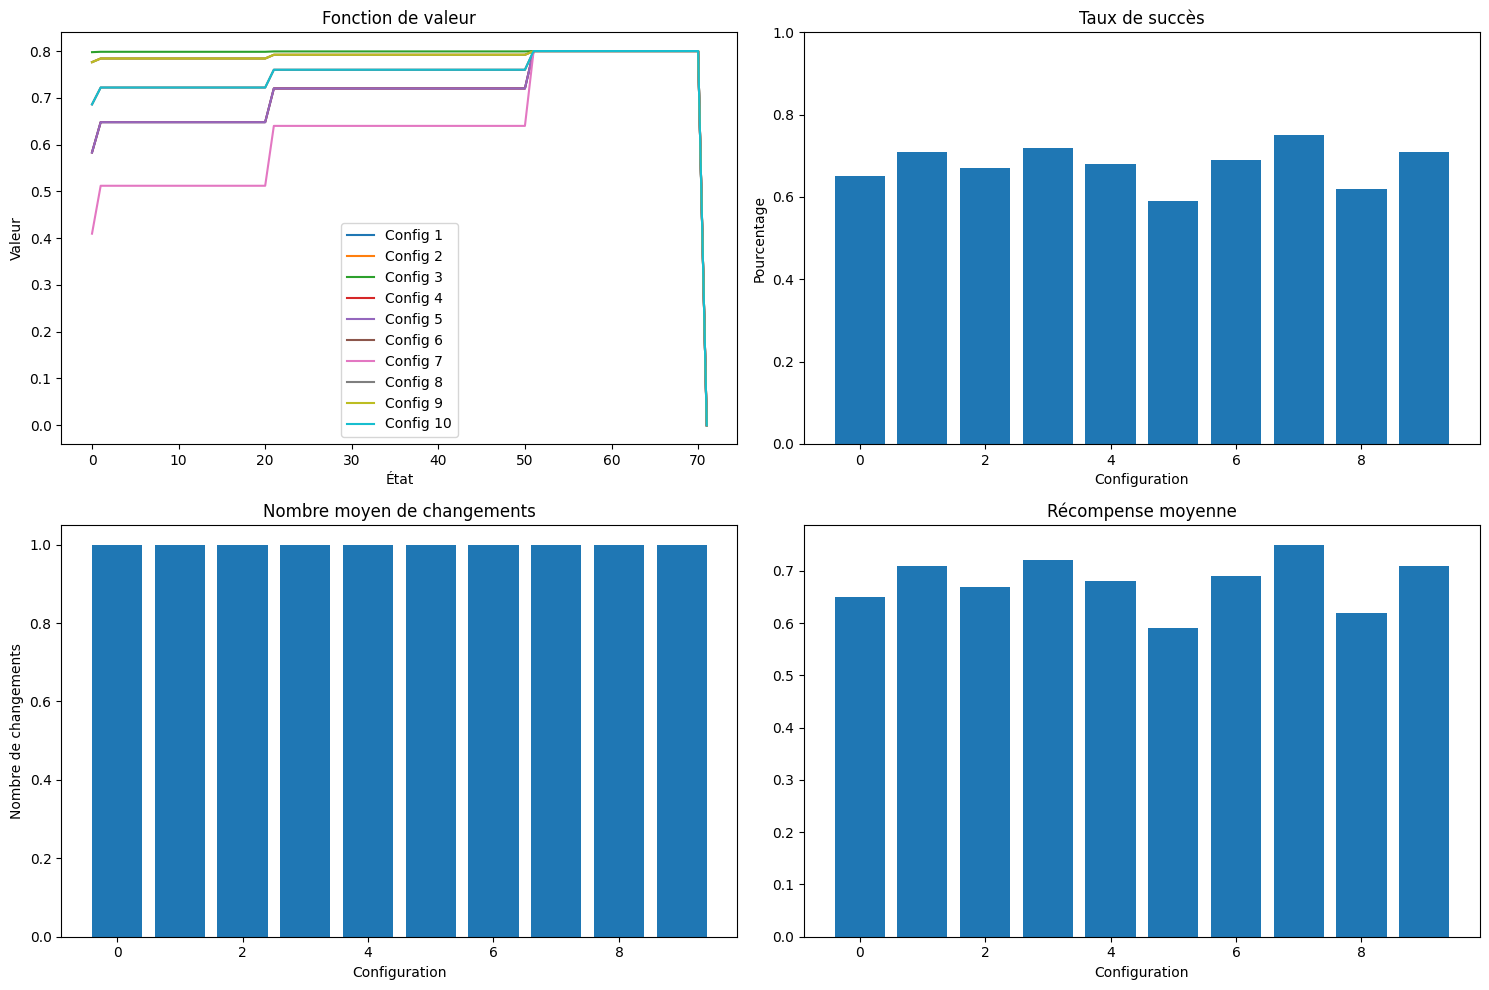

In [13]:
# Visualisation des résultats Monty Hall Niveau 2
plt.figure(figsize=(15, 10))

# Fonction de valeur pour chaque configuration
plt.subplot(221)
for i, r in enumerate(results):
    plt.plot(r['V'], label=f"Config {i+1}")
plt.title('Fonction de valeur')
plt.xlabel('État')
plt.ylabel('Valeur')
plt.legend()

# Taux de succès
plt.subplot(222)
plt.bar(range(len(results)), [r['success_rate'] for r in results])
plt.title('Taux de succès')
plt.xlabel('Configuration')
plt.ylabel('Pourcentage')
plt.ylim(0, 1)

# Nombre moyen de changements
plt.subplot(223)
plt.bar(range(len(results)), [r['avg_switches'] for r in results])
plt.title('Nombre moyen de changements')
plt.xlabel('Configuration')
plt.ylabel('Nombre de changements')

# Récompense moyenne
plt.subplot(224)
plt.bar(range(len(results)), [r['avg_reward'] for r in results])
plt.title('Récompense moyenne')
plt.xlabel('Configuration')

plt.tight_layout()
plt.show()

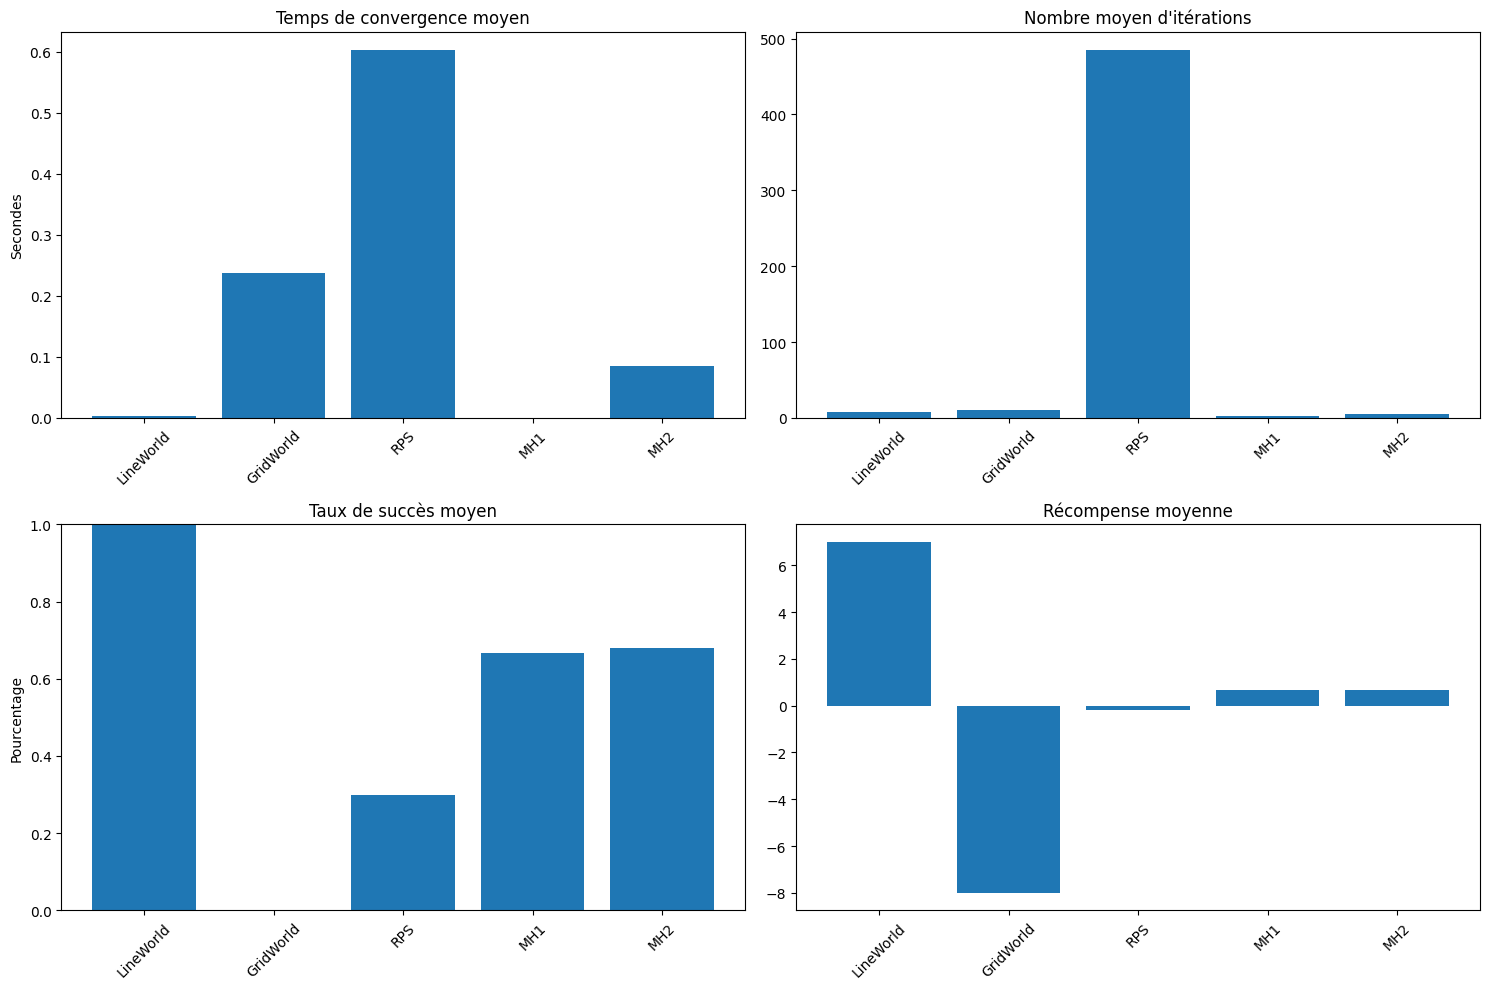

=== RÉSUMÉ COMPARATIF ===

LineWorld:
  - Temps moyen: 0.004s
  - Itérations moyennes: 8.0
  - Taux de succès: 100.0%
  - Récompense moyenne: 7.000

GridWorld:
  - Temps moyen: 0.237s
  - Itérations moyennes: 10.0
  - Taux de succès: 0.0%
  - Récompense moyenne: -8.000

RPS:
  - Temps moyen: 0.603s
  - Itérations moyennes: 484.6
  - Taux de succès: 30.0%
  - Récompense moyenne: -0.200

MH1:
  - Temps moyen: 0.000s
  - Itérations moyennes: 3.0
  - Taux de succès: 66.7%
  - Récompense moyenne: 0.667

MH2:
  - Temps moyen: 0.085s
  - Itérations moyennes: 5.0
  - Taux de succès: 67.9%
  - Récompense moyenne: 0.679



In [14]:
# Comparaison globale des environnements
plt.figure(figsize=(15, 10))

env_names = ['LineWorld', 'GridWorld', 'RPS', 'MH1', 'MH2']
all_results = [results_line, results_grid, results_rps, results_mh1, results_mh2]

# Temps de convergence moyen
plt.subplot(221)
avg_times = [np.mean([r['training_time'] for r in res]) for res in all_results]
plt.bar(env_names, avg_times)
plt.title('Temps de convergence moyen')
plt.ylabel('Secondes')
plt.xticks(rotation=45)

# Nombre moyen d'itérations
plt.subplot(222)
avg_iterations = [np.mean([r['iterations'] for r in res]) for res in all_results]
plt.bar(env_names, avg_iterations)
plt.title('Nombre moyen d\'itérations')
plt.xticks(rotation=45)

# Taux de succès moyen (avec gestion des différents formats de résultats)
plt.subplot(223)
success_rates = []
for res in all_results:
    if 'success_rate' in res[0]:  # MontyHall environnements
        success_rates.append(np.mean([r['success_rate'] for r in res]))
    else:  # Autres environnements - utiliser total_reward > 0
        success_rates.append(np.mean([r['total_reward'] > 0 for r in res]))
        
plt.bar(env_names, success_rates)
plt.title('Taux de succès moyen')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Récompense moyenne
plt.subplot(224)
avg_rewards = []
for res in all_results:
    if 'avg_reward' in res[0]:  # MontyHall environnements
        avg_rewards.append(np.mean([r['avg_reward'] for r in res]))
    else:  # Autres environnements
        avg_rewards.append(np.mean([r['total_reward'] for r in res]))
        
plt.bar(env_names, avg_rewards)
plt.title('Récompense moyenne')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Affichage des statistiques numériques
print("=== RÉSUMÉ COMPARATIF ===\n")
for i, env_name in enumerate(env_names):
    print(f"{env_name}:")
    print(f"  - Temps moyen: {avg_times[i]:.3f}s")
    print(f"  - Itérations moyennes: {avg_iterations[i]:.1f}")
    print(f"  - Taux de succès: {success_rates[i]:.1%}")
    print(f"  - Récompense moyenne: {avg_rewards[i]:.3f}")
    print()
